In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import LinearSegmentedColormap

import statistics as stat
import math
import json

from urllib.request import urlopen
from datetime import datetime, timedelta
from collections import Counter

# Global Level Gathering
The following cell automatically builds the url that is linked to the download page from the [ECDC Website](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). The ECDC updates the file name to match the day that is was most currently updated, so by getting todays date, we can grab the most up to date data from the website. 


In [2]:
time = datetime.now()
date = time.strftime("%Y-%m-%d")
url = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
df = pd.read_excel(url, parse_dates=['dateRep'])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia


In [3]:
# this cell is for adding a value for Spain for today, 
# since they are the only country that doesn't report the latest day on time
# this cell just duplicates their previous days data
today_timestamp = df.dateRep.tolist()[0]
spainData = df[df['countriesAndTerritories']=='Spain']

spainRow = {
    'dateRep': [today_timestamp],
    'day': [today_timestamp.day],
    'month': [today_timestamp.month],
    'year': [today_timestamp.year],
    'cases': [spainData.cases.values[0]],
    'deaths': [spainData.deaths.values[0]],
    'countriesAndTerritories': ['Spain'],
    'geoId': ['ES'],
    'countryterritoryCode': ['ESP'],
    'popData2018': [46723749],
    'continentExp': ['Europe']
}

row_df = pd.DataFrame(data=spainRow)
df = pd.concat([row_df, df], ignore_index=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-21,21,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe
1,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
#pass a sliced list to determine
def running_sum(a):
  tot = 0
  for item in a:
    tot += item
    yield tot

In [5]:
def total_cases(df, string):
    row = df[string]
    num_list = row.values
    tot = np.cumsum(num_list)
    return tot

In [6]:
def recentNationDate():
    return df['dateRep'][:1].values[0]

In [7]:
#variable definition
countries = df['countriesAndTerritories'].unique().tolist()
interest = ['United_States_of_America', 'Italy', 'China', 'Iran']

In [8]:
#This cell creates a running total value for CASES in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
    df_temp['Total Cases'] = total_cases(df_temp, 'cases')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases
0,2020-05-21,21,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,233073
15747,2020-05-20,20,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,232555
15748,2020-05-19,19,5,2020,431,69,Spain,ES,ESP,46723749.0,Europe,232037
15749,2020-05-18,18,5,2020,256,59,Spain,ES,ESP,46723749.0,Europe,231606
15750,2020-05-17,17,5,2020,652,87,Spain,ES,ESP,46723749.0,Europe,231350


In [9]:
#This cell creates a running total value for DEATHS in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
    df_temp['Total Deaths'] = total_cases(df_temp, 'deaths')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths
0,2020-05-21,21,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,233073,27998
15747,2020-05-20,20,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,232555,27888
15748,2020-05-19,19,5,2020,431,69,Spain,ES,ESP,46723749.0,Europe,232037,27778
15749,2020-05-18,18,5,2020,256,59,Spain,ES,ESP,46723749.0,Europe,231606,27709
15750,2020-05-17,17,5,2020,652,87,Spain,ES,ESP,46723749.0,Europe,231350,27650


In [10]:
#Feature Engineering
df['Cases/1M Pop'] = df['Total Cases']/df['popData2018']*1000000
df['Deaths/1M Pop'] = df['Total Deaths']/df['popData2018']*1000000
df['Deaths/Case'] = df['Total Deaths']/df['Total Cases']

df['New Case %']=df['cases']/(df['Total Cases']-df['cases'])*100
df['New Death %']=df['deaths']/(df['Total Deaths']-df['deaths'])*100

df['New Case/1M Pop'] = df['cases']/df['popData2018']*1000000
df['New Death/1M Pop'] = df['deaths']/df['popData2018']*1000000

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths,Cases/1M Pop,Deaths/1M Pop,Deaths/Case,New Case %,New Death %,New Case/1M Pop,New Death/1M Pop
0,2020-05-21,21,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,233073,27998,4988.319751,599.224176,0.120125,0.222743,0.394435,11.086439,2.354263
15747,2020-05-20,20,5,2020,518,110,Spain,ES,ESP,46723749.0,Europe,232555,27888,4977.233312,596.869913,0.119920,0.223240,0.395997,11.086439,2.354263
15748,2020-05-19,19,5,2020,431,69,Spain,ES,ESP,46723749.0,Europe,232037,27778,4966.146873,594.515650,0.119714,0.186092,0.249017,9.224431,1.476765
15749,2020-05-18,18,5,2020,256,59,Spain,ES,ESP,46723749.0,Europe,231606,27709,4956.922442,593.038885,0.119639,0.110655,0.213382,5.479012,1.262741
15750,2020-05-17,17,5,2020,652,87,Spain,ES,ESP,46723749.0,Europe,231350,27650,4951.443430,591.776144,0.119516,0.282621,0.315641,13.954360,1.862008


In [11]:
current_totals = df[df['dateRep']==recentNationDate()]
color_list = ['#4a89dc', 
              '#8cc152', 
              '#da4453', 
              '#f6bb42', 
              '#d770ad', 
              '#37bc9b', 
              '#a8620c', 
              '#e9573f', 
              '#3bafda', 
              '#967adc', 
              
              #gray
              '#656d78']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_list) 

### Total Cases over Time

Total Cases: 4960797
Total Deaths: 328007


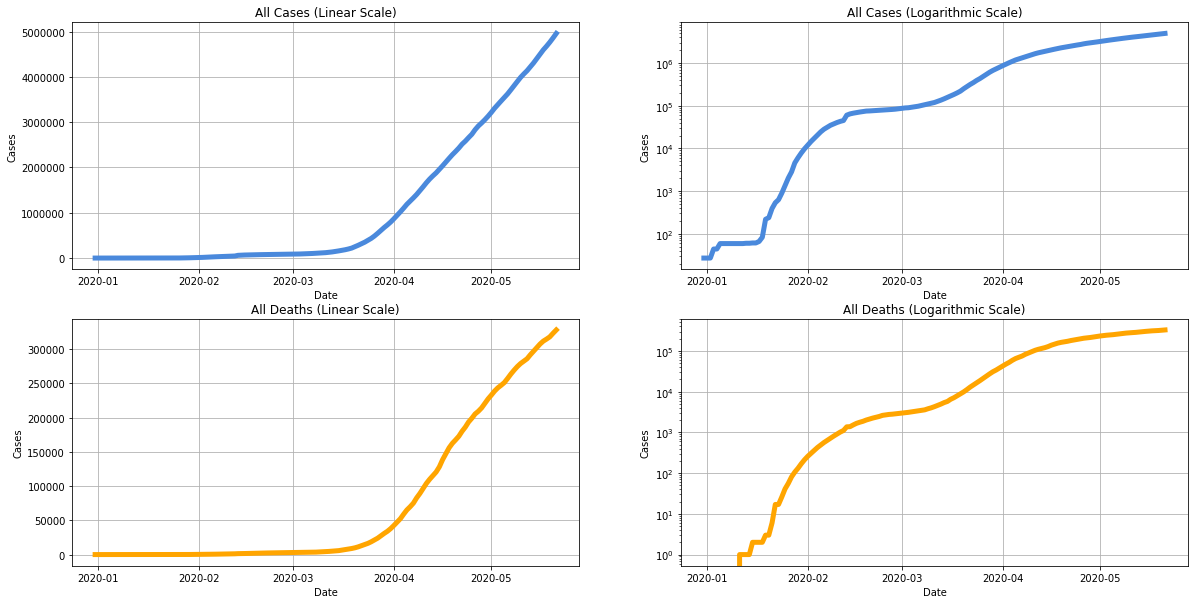

In [12]:
dailyTotal = []
deathTotal = []
daysList = df['dateRep'].unique()

for d in daysList:
    df_temp = df[df['dateRep']==d]
    totCases = sum(df_temp['Total Cases'])
    dailyTotal.append([d, totCases])
    total_deaths = sum(df_temp['Total Deaths'])
    deathTotal.append([d, total_deaths])

print("Total Cases: "+str(dailyTotal[0][1]))
print("Total Deaths: "+str(deathTotal[0][1]))
def myFunc(e):
    return e[0]

dailyTotal.sort(key=myFunc)
deathTotal.sort(key=myFunc)

daysC = []
valsC = []
for d in dailyTotal:
    daysC.append(d[0])
    valsC.append(d[1])
    
daysD = []
valsD = []
for d in deathTotal:
    daysD.append(d[0])
    valsD.append(d[1])
    
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
ax0.plot(daysC, valsC, linewidth=5)
ax0.set_title('All Cases (Linear Scale)')
ax0.set_ylabel('Cases')
ax0.set_xlabel('Date')
ax0.grid()

ax1.plot(daysC, valsC, linewidth=5)
ax1.set_title('All Cases (Logarithmic Scale)')
ax1.set_yscale('log')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.grid()

ax2.plot(daysD, valsD, linewidth=5, color='orange')
ax2.set_title('All Deaths (Linear Scale)')
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.grid()

ax3.plot(daysD, valsD, linewidth=5, color='orange')
ax3.set_title('All Deaths (Logarithmic Scale)')
ax3.set_yscale('log')
ax3.set_ylabel('Cases')
ax3.set_xlabel('Date')
ax3.grid()

fig.set_figwidth(20)
fig.set_figheight(10)
fig.savefig('images/Cases and Deaths')

In [13]:
high_new_cases = current_totals.sort_values(by='New Case %', ascending=False)
high_new_cases.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths,Cases/1M Pop,Deaths/1M Pop,Deaths/Case,New Case %,New Death %,New Case/1M Pop,New Death/1M Pop
10902,2020-05-21,21,5,2020,50,0,Mauritania,MR,MRT,4403319.0,Africa,131,4,29.750286,0.908406,0.030534,61.728395,0.000000,11.355071,0.000000
4752,2020-05-21,21,5,2020,310,2,Djibouti,DJ,DJI,958920.0,Africa,1828,9,1906.311267,9.385559,0.004923,20.421607,28.571429,323.280357,2.085680
2352,2020-05-21,21,5,2020,4,0,Botswana,BW,BWA,2254126.0,Africa,29,1,12.865297,0.443631,0.034483,16.000000,0.000000,1.774524,0.000000
10443,2020-05-21,21,5,2020,45,0,Madagascar,MG,MDG,26262368.0,Africa,371,2,14.126677,0.076155,0.005391,13.803681,0.000000,1.713478,0.000000
16642,2020-05-21,21,5,2020,207,3,Tajikistan,TJ,TJK,9100837.0,Asia,1936,44,212.727686,4.834720,0.022727,11.972238,7.317073,22.745161,0.329640
11826,2020-05-21,21,5,2020,42,0,Nepal,NP,NPL,28087871.0,Asia,444,2,15.807535,0.071205,0.004505,10.447761,0.000000,1.495307,0.000000
18012,2020-05-21,21,5,2020,75,0,Venezuela,VE,VEN,28870195.0,America,824,10,28.541546,0.346378,0.012136,10.013351,0.000000,2.597835,0.000000
2162,2020-05-21,21,5,2020,438,10,Bolivia,BO,BOL,11353142.0,America,4919,199,433.272129,17.528187,0.040455,9.774604,5.291005,38.579628,0.880813
3534,2020-05-21,21,5,2020,4038,35,Chile,CL,CHL,18729160.0,America,53617,544,2862.755190,29.045617,0.010146,8.144577,6.876228,215.599632,1.868744
18245,2020-05-21,21,5,2020,13,1,Yemen,YE,YEM,28498687.0,Asia,180,29,6.316080,1.017591,0.161111,7.784431,3.571429,0.456161,0.035089


### Total Cases Pie Chart

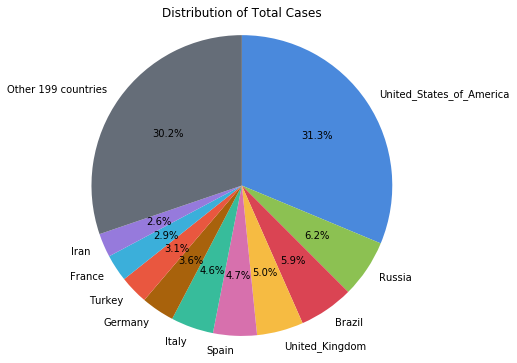

[1551853, 308705, 291579, 248293, 233073, 227364, 176752, 152587, 143845, 126949, 1499797]


In [14]:
# total cases pie chart
pie_df = current_totals[['countriesAndTerritories', 'Total Cases']]
pie_df = pie_df.sort_values(by=['Total Cases'], ascending=False)

values = pie_df['Total Cases'][:10].tolist()
labels = pie_df['countriesAndTerritories'][:10].tolist()
rest = pie_df[10:].sum(axis = 0, skipna = True)[1]
count = pie_df[10:].count(axis = 0)[1]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Cases')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Cases')

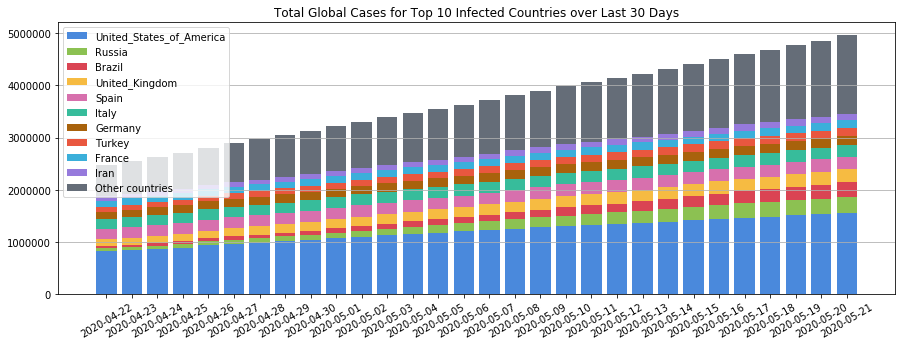

In [15]:
num_charts = 30
recent_date = df['dateRep'][0] 

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recent_date]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()
# print(labels)

dates = []

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    dates.append(str(day.date()))
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Cases']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Cases']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Cases for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)

fig = plt.gcf()
# ax.get_yaxis().set_major_formatter(
#     mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Cases Over Previous X Days')

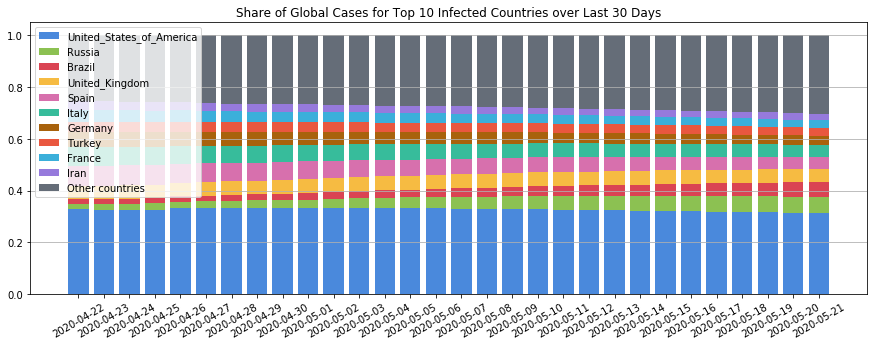

In [16]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recent_date]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

dates=[]

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    dates.append(str(day.date()))
    recent = df[df['dateRep']==day]
    
    totCases = sum(recent['Total Cases'])
    topCases = 0
    current_totals = recent[['countriesAndTerritories', 'Total Cases']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Cases']].values[0][0]
        except IndexError:
            temp = 0;
        topCases += temp
        values.append(temp/totCases)

    current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
    rest = totCases-topCases
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest/totCases)
    
    col_num=0
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom, color=color_list[col_num])
        bottom+=val
        col_num+=1

    day_back +=1

#x-axis labels
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Share of Global Cases for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels, loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Share of Total Cases Over Top 10')

### Daily Infection/Country
Graphing the top X most infected countries daily infections over the last X days, so we can see a trend about which countires are becoming more infected

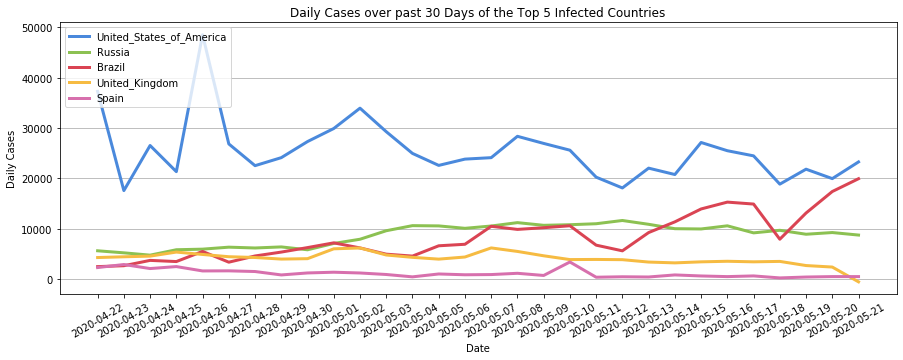

In [17]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
# data = np.arange(days)

for c in top5:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['cases']))
    plt.plot(data, df_nation['cases'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Daily Cases over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Cases of Top 10 Infected Countries')

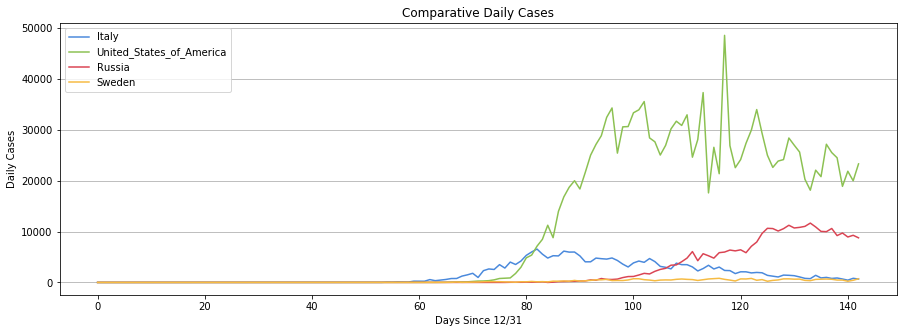

In [68]:
pick = [
    'Italy', 
    'United_States_of_America',
    'Russia',
    'Sweden'
    ]

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, current_totals['cases'], label=c)

plt.title("Comparative Daily Cases")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

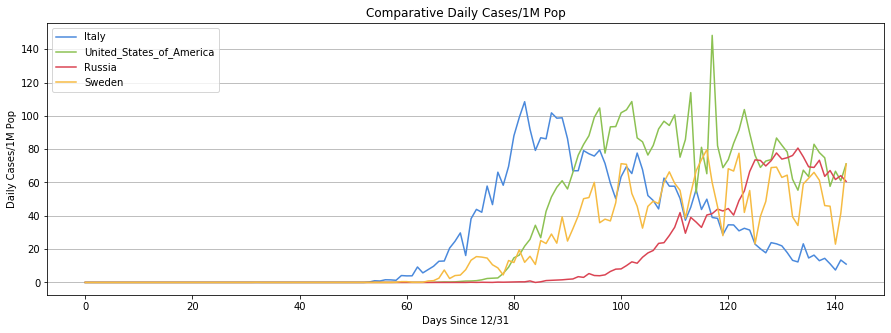

In [69]:
pick = [
    'Italy', 
    'United_States_of_America',
    'Russia',
    'Sweden'
    ]

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, (current_totals['cases']/current_totals['popData2018'])*1000000, label=c)

plt.title("Comparative Daily Cases/1M Pop")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases/1M Pop")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

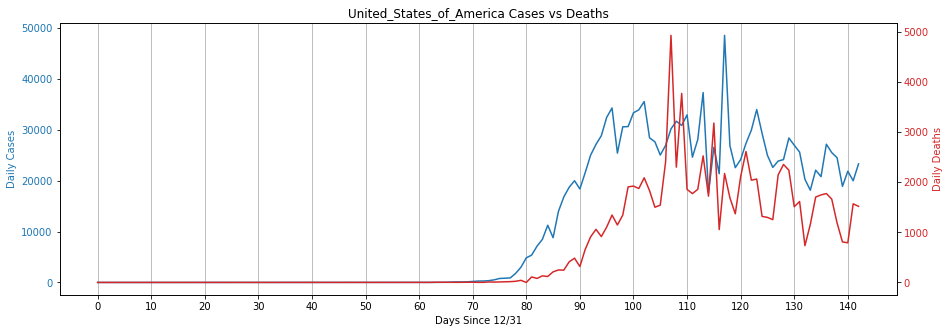

In [71]:
pick = 'United_States_of_America' 
#'United_States_of_America' #'Italy' #'Spain' #'Germany' #'France' #'Iran' #'United_Kingdom' #'Sweden'

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

#reset global variables
current_totals = df[df['countriesAndTerritories']==pick]
data = np.arange(len(current_totals['dateRep']))
current_totals = current_totals.iloc[::-1] #reverse the order
current_totals = current_totals.reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
plt.grid(axis='x')

color = 'tab:blue'
ax1.set_xlabel('Days Since 12/31')
ax1.set_ylabel('Daily Cases', color=color)
ax1.plot(data, current_totals['cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Daily Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(data, current_totals['deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MultipleLocator(10))
plt.title(pick+" Cases vs Deaths")
plt.show()

fig.savefig('images/Comparing Cases vs Deaths')

### Increase in Cases

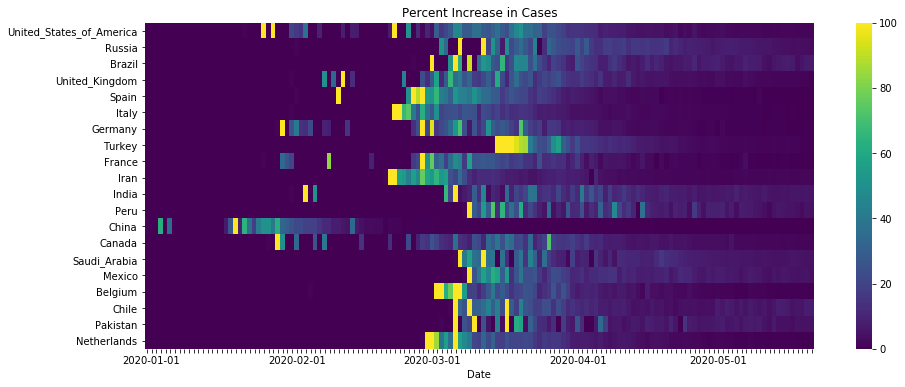

In [21]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Cases of Top X Infected Countries')

### Infection/Population

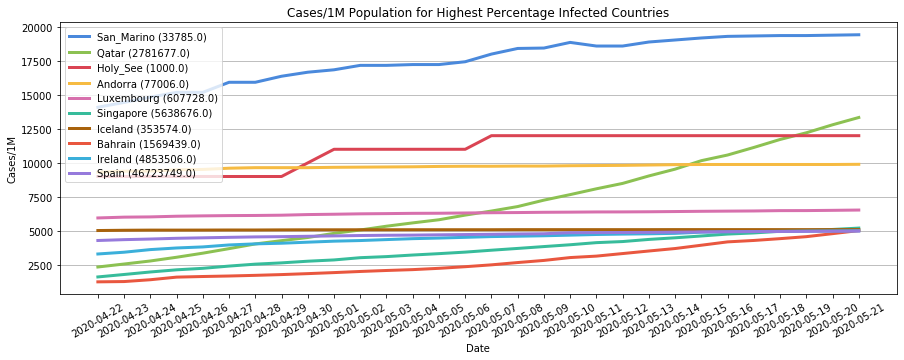

In [22]:
days = 30
top = 10

labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Cases/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c+" ("+str(df_temp['popData2018'].values[-1])+")", linewidth=3)
    
#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population for Highest Percentage Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Infection Rates')

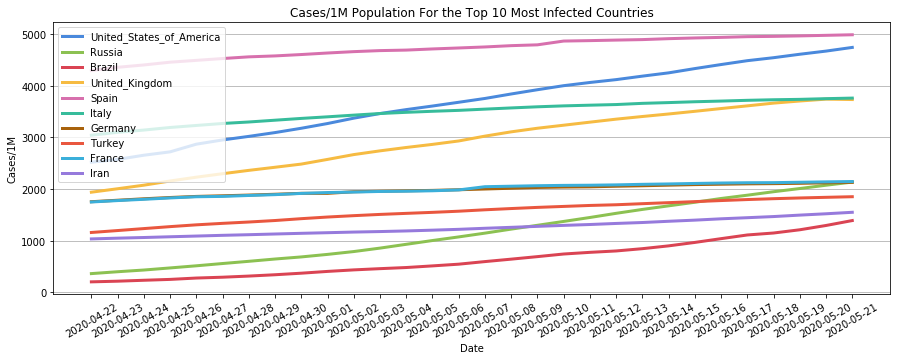

In [23]:
days = 30
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:top].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Infection Rates of Top 10')

### Total Cases by Days Since First Infection Reported
In this cell, I am attempting to show the spread of the virus in each country since an infection was first reported. This will allow people to see how fast the infection is spreading in each country relative to the infection instead of having each country staggered.

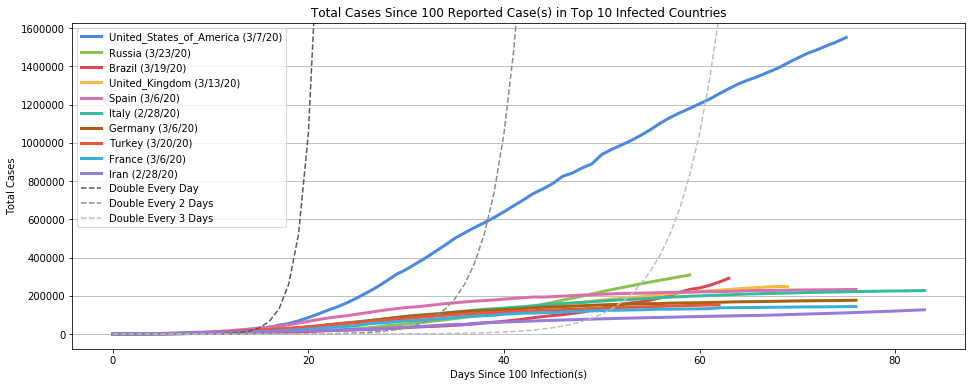

In [24]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Cases'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')

# plt.ylim(bottom, top)     # set the ylim to bottom, top
# plt.xlim(left, right)     # set the xlim to left, right

plt.legend()
plt.title("Total Cases Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Total Cases")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Total Infections Since X Cases')

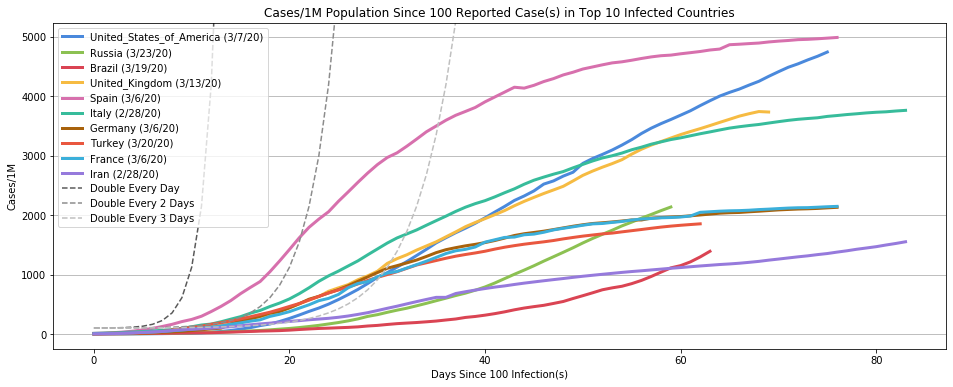

In [26]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Cases/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')


plt.legend()
plt.title("Cases/1M Population Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Cases/1M")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top
plt.show()

fig.savefig('images/Cases per 1M Population since X Reported Case(s)')

In [27]:
def getKey(df):
    return df[1]

In [28]:
first_infected = []
for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>0].tail(1) #grab the first date of the infection
    if(day1.empty==False):
        first_infected.append([c, day1.iloc[0]['dateRep']])
first_infected = sorted(first_infected, key=getKey)
print(len(first_infected))
first_infected

210


[['China', Timestamp('2019-12-31 00:00:00')],
 ['Thailand', Timestamp('2020-01-13 00:00:00')],
 ['Japan', Timestamp('2020-01-15 00:00:00')],
 ['South_Korea', Timestamp('2020-01-20 00:00:00')],
 ['Taiwan', Timestamp('2020-01-21 00:00:00')],
 ['United_States_of_America', Timestamp('2020-01-21 00:00:00')],
 ['Singapore', Timestamp('2020-01-24 00:00:00')],
 ['Vietnam', Timestamp('2020-01-24 00:00:00')],
 ['Australia', Timestamp('2020-01-25 00:00:00')],
 ['France', Timestamp('2020-01-25 00:00:00')],
 ['Malaysia', Timestamp('2020-01-25 00:00:00')],
 ['Nepal', Timestamp('2020-01-25 00:00:00')],
 ['Canada', Timestamp('2020-01-26 00:00:00')],
 ['United_Arab_Emirates', Timestamp('2020-01-27 00:00:00')],
 ['Cambodia', Timestamp('2020-01-28 00:00:00')],
 ['Germany', Timestamp('2020-01-28 00:00:00')],
 ['Sri_Lanka', Timestamp('2020-01-28 00:00:00')],
 ['Finland', Timestamp('2020-01-30 00:00:00')],
 ['India', Timestamp('2020-01-30 00:00:00')],
 ['Philippines', Timestamp('2020-01-30 00:00:00')],
 ['I

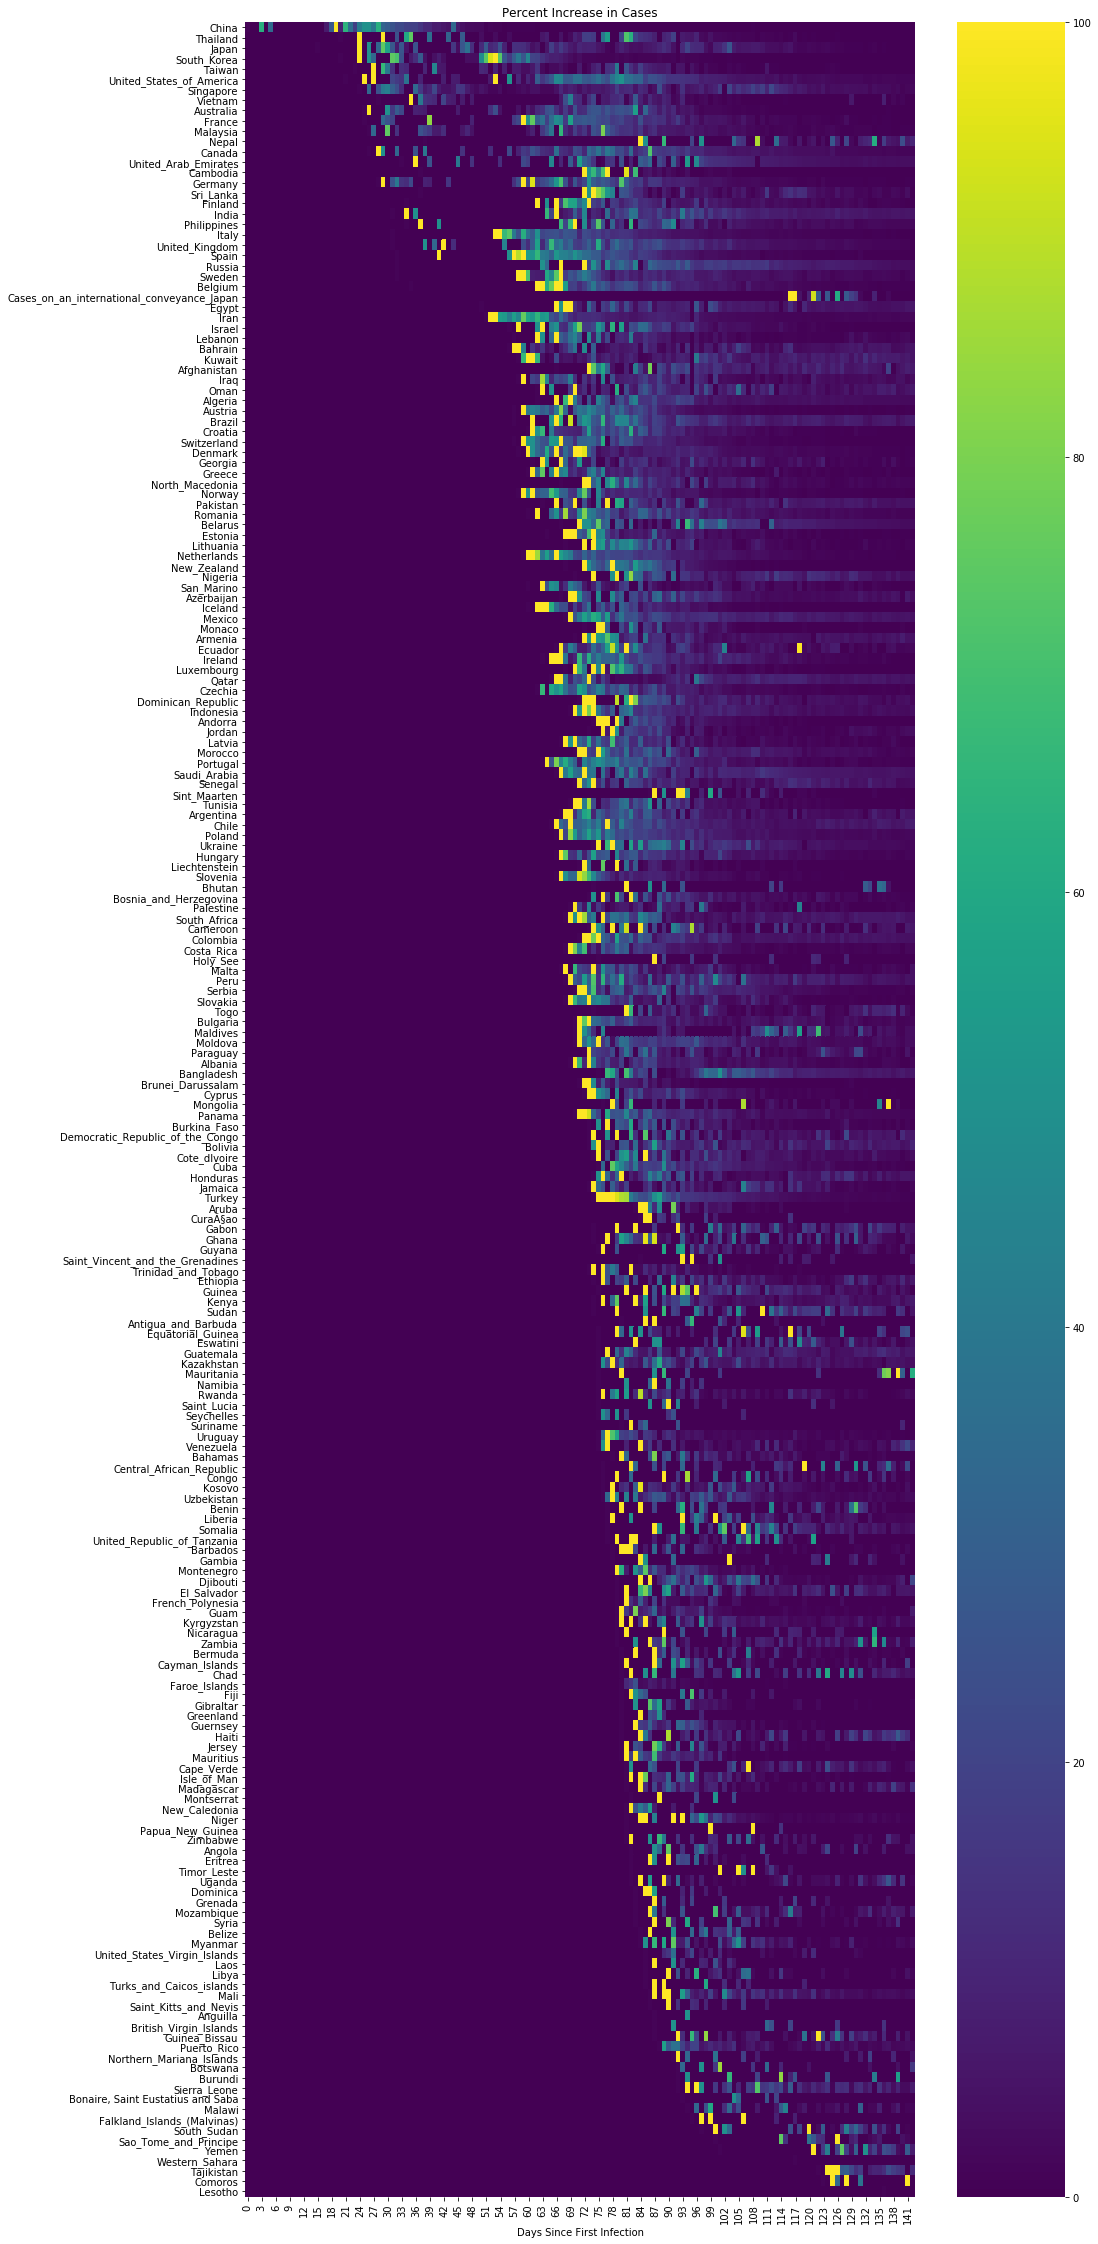

In [29]:
days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in first_infected:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

fig, ax = plt.subplots(figsize=(15,40))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels)#, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/All Case Infections')

# Death Data
This section will show the same information as above, but focus on deaths instead of total cases

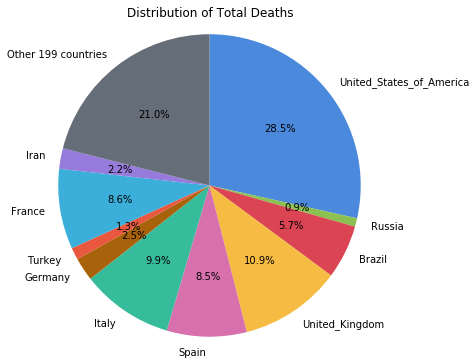

[93439, 2972, 18859, 35704, 27998, 32330, 8147, 4222, 28132, 7183, 69021]


In [30]:
# total deaths pie chart
recent = df[df['dateRep']==recentNationDate()]

current_totals = recent[['countriesAndTerritories', 'Total Cases', 'Total Deaths']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
current_totals.head()

values = current_totals['Total Deaths'][:10].tolist()
labels = current_totals['countriesAndTerritories'][:10].tolist()
rest = current_totals[10:].sum(axis = 0, skipna = True)[2]
count = current_totals[10:].count(axis = 0)[2]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Deaths')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


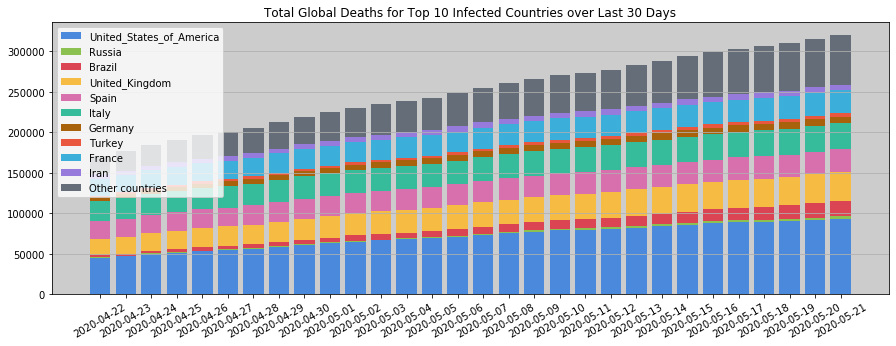

In [31]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recentNationDate()]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Deaths']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Deaths']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Deaths'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    
    day_back +=1

#x-axis labels
dates = []
x_lab = df['dateRep'][:num_charts]
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Deaths for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)


#background color
ax = plt.axes()
ax.set_facecolor("0.8")

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Deaths Over Previous X Days')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


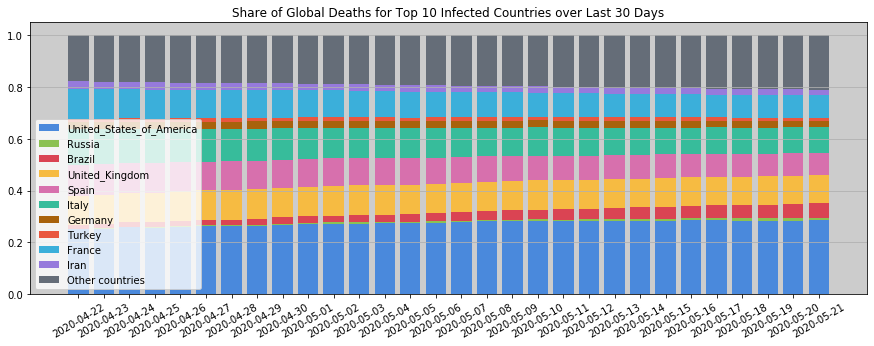

In [32]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recentNationDate()]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = df[df['dateRep']==day]
    
    totCases = sum(recent['Total Deaths'])
    topCases = 0
    current_totals = recent[['countriesAndTerritories', 'Total Deaths']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Deaths']].values[0][0]
        except IndexError:
            temp = 0;
        topCases += temp
        values.append(temp/totCases)

    current_totals = current_totals.sort_values(by=['Total Deaths'], ascending=False)
    rest = totCases-topCases
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest/totCases)
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val

    day_back +=1

#x-axis labels
dates = []
x_lab = df['dateRep'][:num_charts]
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Share of Global Deaths for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

#labels
labels.append('Other countries')
plt.legend(labels, loc='lower left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Share of Total Deaths Over Top 10')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


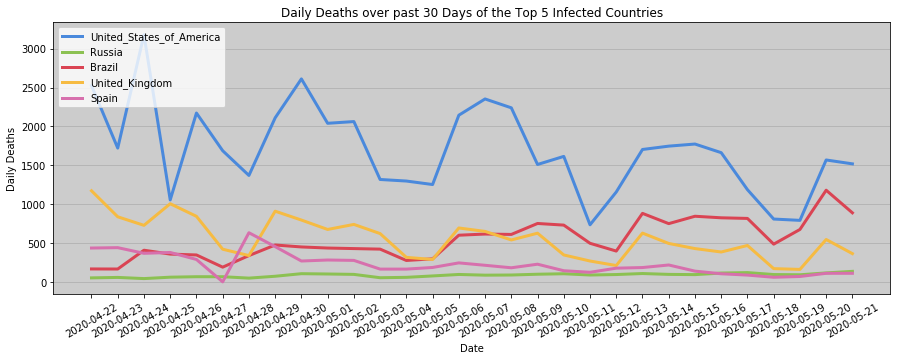

In [33]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
data = np.arange(days)

for c in top5:
    df_nation=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['deaths']))
    plt.plot(data, df_nation['deaths'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.title("Daily Deaths over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Deaths")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Deaths of Top 10 Infected Countries')

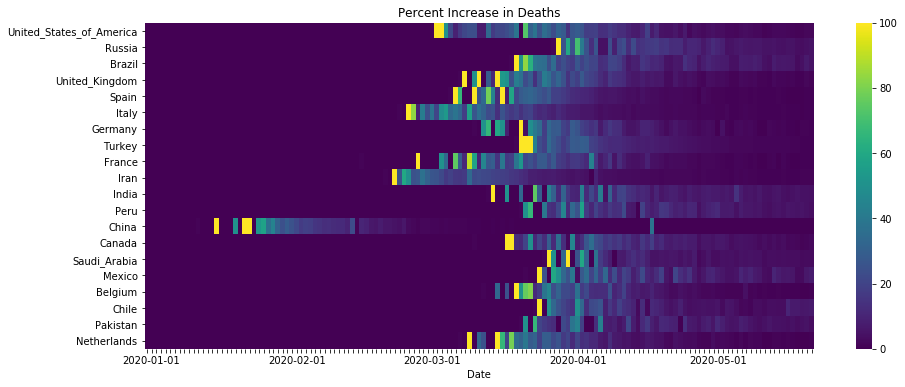

In [34]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values


days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep']
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Death %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

lastLabels = lastLabels[::-1]
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Deaths')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Deaths of Top X Infected Countries')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


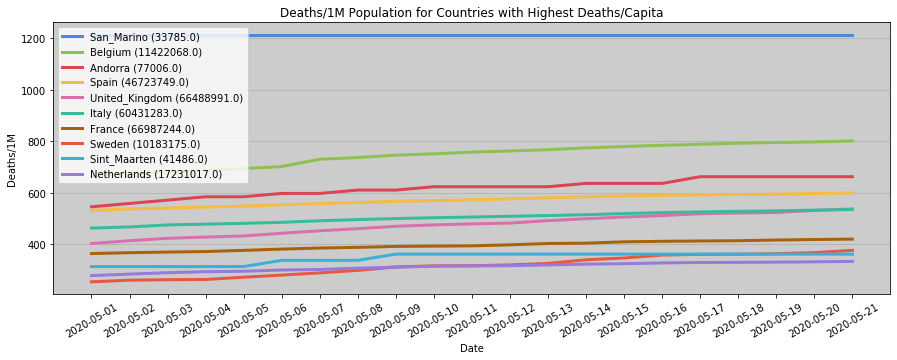

In [35]:
days = 21
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Deaths/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c+" ("+str(df_temp['popData2018'].values[-1])+")", linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")    

plt.title("Deaths/1M Population for Countries with Highest Deaths/Capita")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Death Rates')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


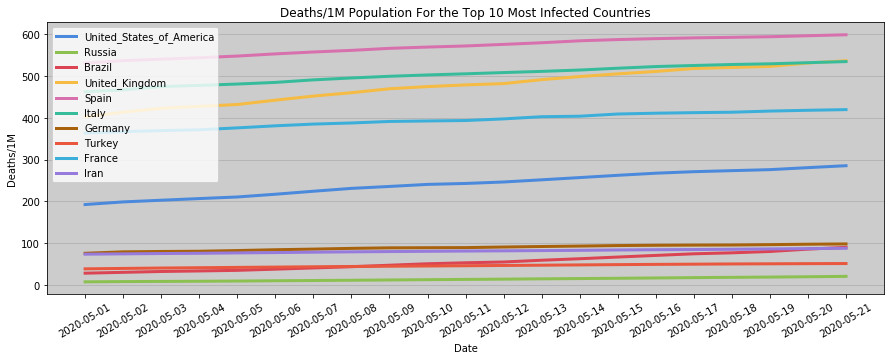

In [36]:
days = 21

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:10].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")
    
plt.title("Deaths/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Death Rates of Top 10')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


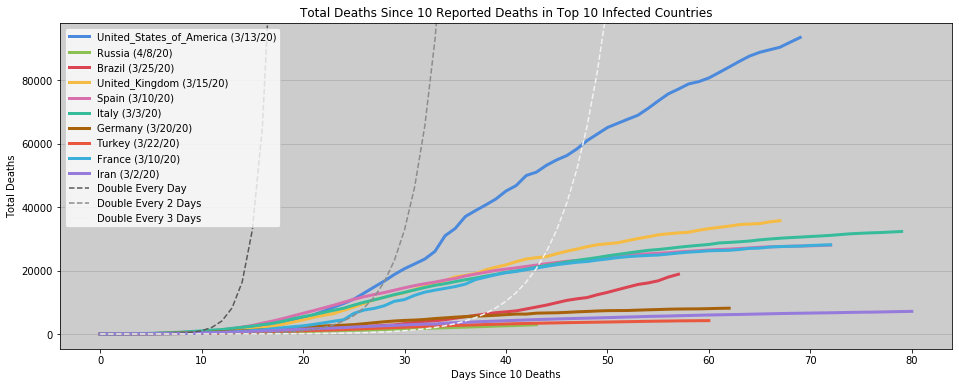

In [37]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Deaths'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Total Deaths Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Total Deaths")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top

plt.show()

fig.savefig('images/Total Deaths Since X Reported Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


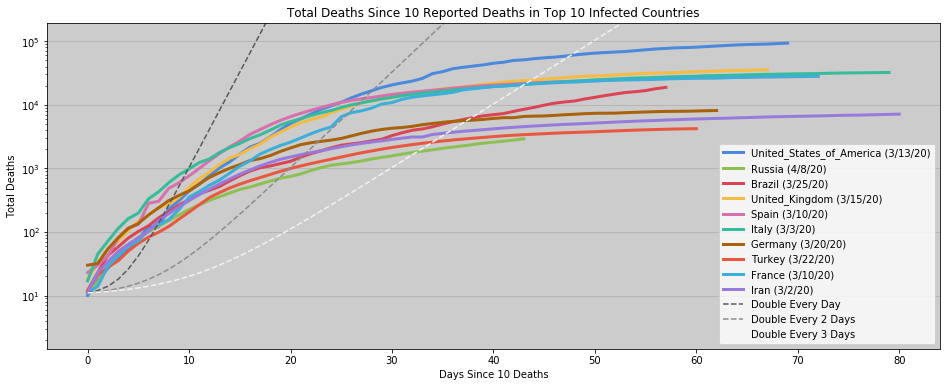

In [38]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Deaths'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Total Deaths Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Total Deaths")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.yscale('log')
plt.grid(axis='y')
plt.ylim(top, bottom*2)     # set the ylim to bottom, top

plt.show()

fig.savefig('images/Total Deaths Since X Reported Deaths (Log)')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


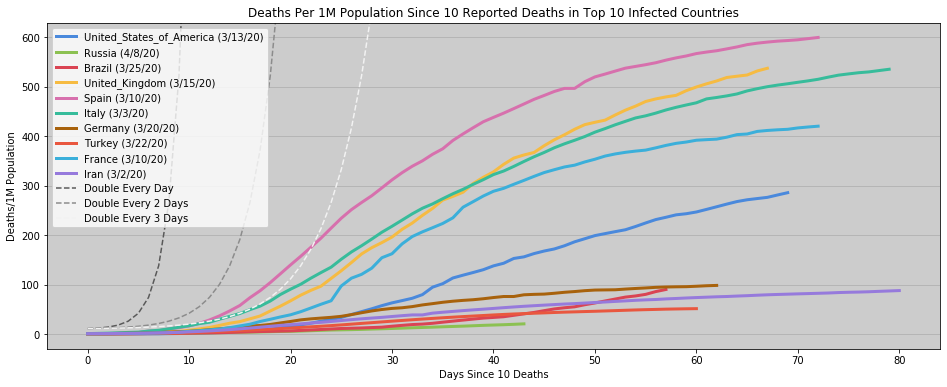

In [39]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
#     df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Deaths/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Deaths Per 1M Population Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Deaths/1M Population")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Deaths Per 1M Population Since X Reported Deaths')

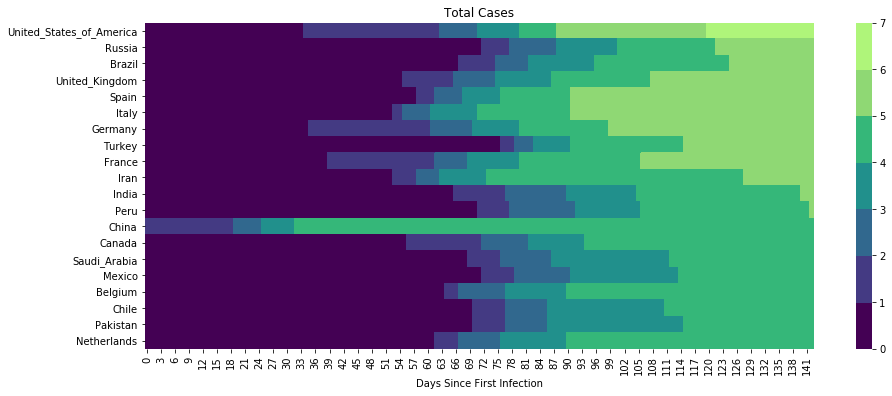

In [40]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Cases'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Categorical Heat Map')

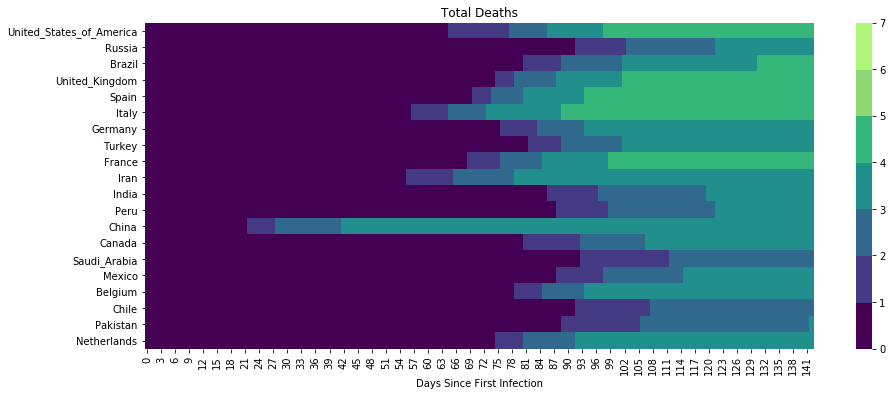

In [41]:
top = 20

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Deaths'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Deaths')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Deaths Categorical Heat Map')

# State Data
This next section will focus on creating insights for individual US states. I am using this data base:
- Case Data: https://covidtracking.com/api/states.csv
- Census Data: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

to pull my data, which updates freqently (the website says it updates every few minutes, from my experience it updates daily)

In [74]:
states = pd.read_csv('http://covidtracking.com/api/states/daily.csv',
                    parse_dates=['dateChecked', 'date'])

# print(states.columns)

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
statePop = pd.read_csv(url, encoding='ISO-8859-1')
statePop = statePop[statePop['SUMLEV']==40]
statePop = statePop[['STATE', 'POPESTIMATE2019']]
states = pd.merge(states, statePop, left_on='fips', right_on='STATE')

states['test percent']= (states['positive']/(states['positive']+states['negative']))*100
states['cases/1M']= states['positive']/states['POPESTIMATE2019']*1000000
states['deaths/1M']= states['death']/states['POPESTIMATE2019']*1000000
states = states.drop(['STATE'], axis=1)

states['new case %']=states['positiveIncrease']/states['positive']
states['new death %']=states['deathIncrease']/states['death']

#this drops all the hospital data, which is currently not used...
states['population'] = states['POPESTIMATE2019']
all_state_data = states
print(all_state_data.columns)
states = states[['date', 'fips', 'state', 'population', 'positive', 'negative', 'total', 'death', 'positiveIncrease', 'deathIncrease', 'test percent', 'cases/1M', 'deaths/1M', 'new case %', 'new death %']]

#feature engineering
states['new cases/1M'] = states['positiveIncrease']/states['population']*1000000
states['new deaths/1M'] = states['deathIncrease']/states['population']*1000000

states.head()

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease', 'POPESTIMATE2019',
       'test percent', 'cases/1M', 'deaths/1M', 'new case %', 'new death %',
       'population'],
      dtype='object')


/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %,new cases/1M,new deaths/1M
0,2020-05-20,2,AK,731545,402.0,36643.0,37045,10.0,3.0,0.0,1.085167,549.521902,13.669699,0.007463,0.0,4.10091,0.0
1,2020-05-19,2,AK,731545,399.0,35981.0,36380,10.0,0.0,0.0,1.096756,545.420993,13.669699,0.000000,0.0,0.00000,0.0
2,2020-05-18,2,AK,731545,399.0,35212.0,35611,10.0,3.0,0.0,1.120440,545.420993,13.669699,0.007519,0.0,4.10091,0.0
3,2020-05-17,2,AK,731545,396.0,34255.0,34651,10.0,4.0,0.0,1.142824,541.320083,13.669699,0.010101,0.0,5.46788,0.0
4,2020-05-16,2,AK,731545,392.0,32889.0,33281,10.0,4.0,0.0,1.177849,535.852203,13.669699,0.010204,0.0,5.46788,0.0


In [43]:
def recentStateDate():
    return states['date'][:1].values[0]

In [44]:
#gather the top 10 infected states
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by=['positive'], ascending=False)
recentStates.set_index('date', inplace=True)
recentStates

,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %
date,,,,,,,,,,,,,,
2020-05-20,36,NY,19453561,354370.0,1151466.0,1505836,22976.0,1525.0,133.0,23.533107,18216.202165,1181.069111,0.004303,0.005789
2020-05-20,34,NJ,8882190,150399.0,380944.0,531343,10747.0,1386.0,161.0,28.305445,16932.648367,1209.949348,0.009215,0.014981
2020-05-20,17,IL,12671821,100418.0,542295.0,642713,4525.0,2388.0,146.0,15.624081,7924.512191,357.091534,0.023781,0.032265
2020-05-20,25,MA,6892503,88970.0,400983.0,489953,6066.0,1045.0,128.0,18.158885,12908.227969,880.086668,0.011746,0.021101
2020-05-20,6,CA,39512223,84057.0,1296063.0,1380120,3436.0,2262.0,102.0,6.090557,2127.367018,86.960432,0.026910,0.029686
2020-05-20,42,PA,12801989,63666.0,286034.0,349700,4624.0,0.0,0.0,18.205891,4973.133472,361.193874,0.000000,0.000000
2020-05-20,26,MI,9986857,53009.0,384063.0,437072,5060.0,659.0,43.0,12.128208,5307.876142,506.665911,0.012432,0.008498
2020-05-20,48,TX,28995881,51323.0,718918.0,770241,1419.0,1411.0,50.0,6.663239,1770.010023,48.937985,0.027493,0.035236
2020-05-20,12,FL,21477737,47471.0,723877.0,772705,2173.0,527.0,44.0,6.154291,2210.242168,101.174532,0.011102,0.020249


In [45]:
print("Average Cases/State: "+str(stat.mean(recentStates['positive'].values.tolist())))
print("Median Cases/State: "+str(stat.median(recentStates['positive'].values.tolist())))

state_avg = stat.mean(recentStates['positive'].values.tolist())
state_median = stat.median(recentStates['positive'].values.tolist())

Average Cases/State: 30180.156862745098
Median Cases/State: 12744.0


### State Infection

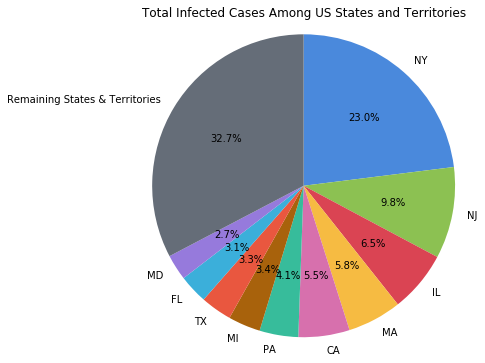

In [46]:
#pie chart
count=0

state_values = recentStates['positive'][:10].values.tolist()
state_labels = recentStates['state'][:10].values.tolist()
rest_states_values = recentStates['positive'][10:].values.tolist()

for c in rest_states_values:
    if math.isnan(c) == False:
        count+=c

state_values.append(count)
state_labels.append("Remaining States & Territories")

plt.pie(state_values, labels=state_labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Infected Cases Among US States and Territories')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

fig.savefig('images/Infected Cases Among States')

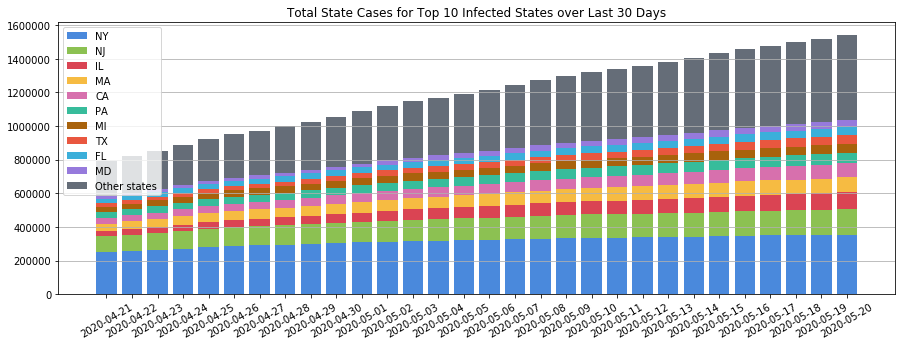

In [47]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)
recent_date = recentStates.index.tolist()[0]

#state labels
recent = states[states['date']==recentStateDate()]
recent = recent.sort_values(by=['positive'], ascending=False)
labels = recent['state'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = states[states['date']==day]
    
    current_totals = recent[['state', 'positive']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['state']==c,['positive']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['positive'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates = []
x_lab = states['date'][:num_charts] #fix xlab
# print(x_lab)
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total State Cases for Top 10 Infected States over Last '+str(num_charts)+' Days')

#labels
labels.append('Other states')
plt.legend(labels)

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 State Cases Over Previous X Days')

### Per Capita Infections

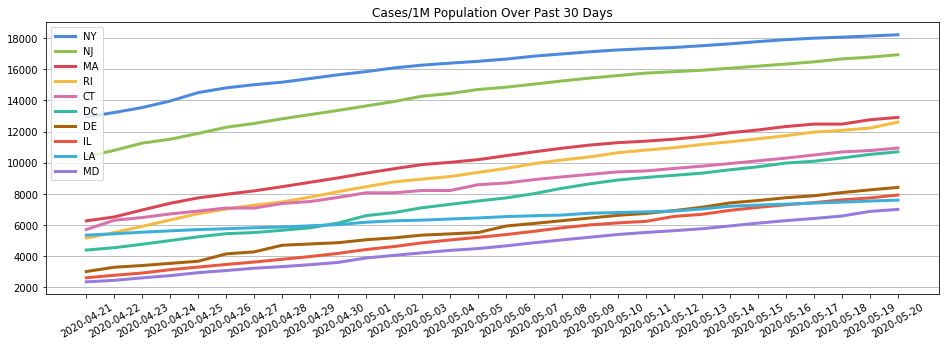

In [48]:
n_days = 30
recentStates = recentStates.sort_values(by=['cases/1M'], ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['cases/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['cases/1M'].values.tolist()[:n_days])

#graph
plt.legend()
plt.title('Cases/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Cases Per 1M Over Time')

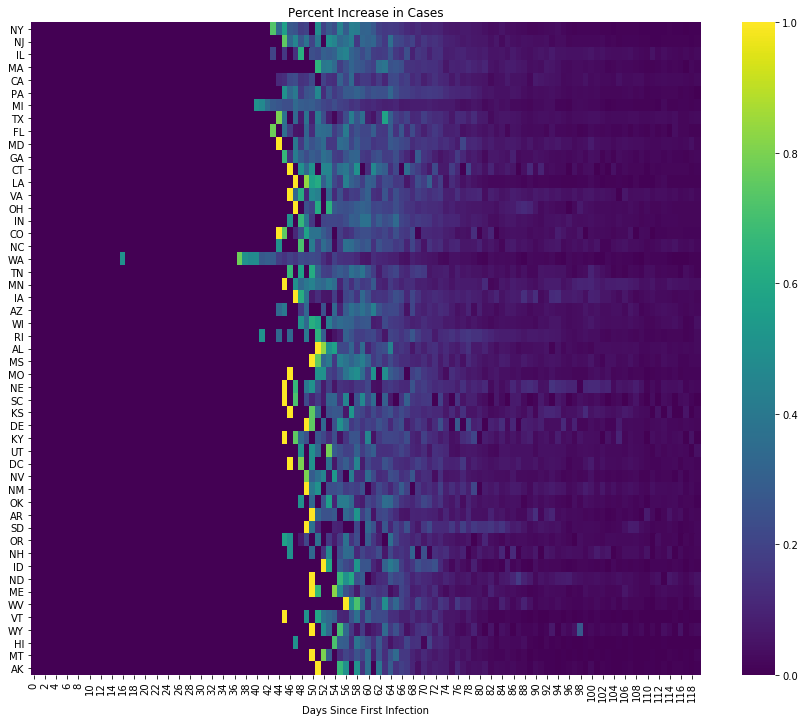

In [49]:
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='positive', ascending=False).state

days = len(states[states.state=='WA'].index)
dayLabels = states[states.state=='WA'].date.tolist()
dayLabels
vals = []
labels = []

for c in recentStates:
    dfState = states[states['state']==c]
    inc = np.array(dfState['new case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c)
    
vals = pd.DataFrame(vals)

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=1, yticklabels=labels, square=False)#, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/All State Infections')

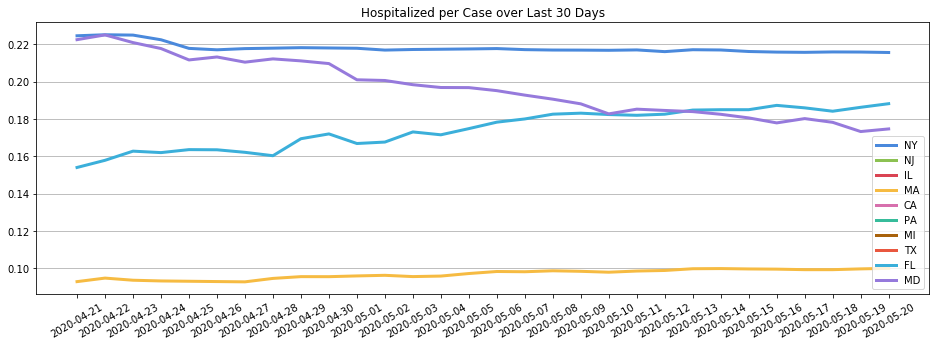

In [50]:
n_days = 30
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='positive', ascending=False).state[:10]

for s in recentStates:
    dfState = all_state_data[all_state_data['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    data = dfState['hospitalized'].values/dfState['positive'].values
    plt.plot(data, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['positive'].values.tolist()[:n_days])

#graph
plt.legend()
plt.title('Hospitalized per Case over Last '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Hospitalized Per Case Over Time')

### Per Capita Deaths

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


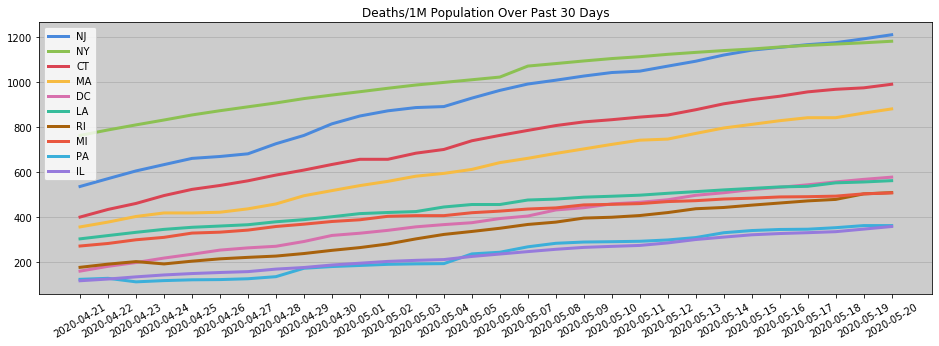

In [51]:
n_days = 30

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='deaths/1M', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['deaths/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['deaths/1M'].values.tolist()[:n_days])

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

#graph
plt.legend()
plt.title('Deaths/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Deaths Per 1M Over Time')

### Positive Testing Rate

In [52]:
pick_state = 'NJ'

states.head()
test = states[states['state']==pick_state]
test.head(14)

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %
2363,2020-05-20,34,NJ,8882190,150399.0,380944.0,531343,10747.0,1386.0,161.0,28.305445,16932.648367,1209.949348,0.009215,0.014981
2364,2020-05-19,34,NJ,8882190,149013.0,371169.0,520182,10586.0,974.0,151.0,28.646320,16776.605770,1191.823188,0.006536,0.014264
2365,2020-05-18,34,NJ,8882190,148039.0,357530.0,505569,10435.0,1705.0,79.0,29.281661,16666.948129,1174.822876,0.011517,0.007571
2366,2020-05-17,34,NJ,8882190,146334.0,341231.0,487565,10356.0,1245.0,107.0,30.013229,16474.990965,1165.928673,0.008508,0.010332
2367,2020-05-16,34,NJ,8882190,145089.0,330135.0,475224,10249.0,1184.0,111.0,30.530655,16334.822831,1153.882094,0.008161,0.010830
2368,2020-05-15,34,NJ,8882190,143905.0,319067.0,462972,10138.0,1201.0,192.0,31.082873,16201.522372,1141.385176,0.008346,0.018939
2369,2020-05-14,34,NJ,8882190,142704.0,308992.0,451696,9946.0,1144.0,244.0,31.592930,16066.307971,1119.768886,0.008017,0.024532
2370,2020-05-13,34,NJ,8882190,141560.0,299890.0,441450,9702.0,817.0,194.0,32.067052,15937.510907,1092.298183,0.005771,0.019996
2371,2020-05-12,34,NJ,8882190,140743.0,292317.0,433060,9508.0,798.0,198.0,32.499654,15845.529087,1070.456723,0.005670,0.020825
2372,2020-05-11,34,NJ,8882190,139945.0,285988.0,425933,9310.0,1413.0,55.0,32.856106,15755.686379,1048.164923,0.010097,0.005908


In [53]:
recentStates = states[states['date']==recentStateDate()]

print("Total Tests Given: "+str(np.nansum(recentStates['total'])))
print("Total Positive: "+str(np.nansum(recentStates['positive'])))
print("Total Negative: "+str(np.nansum(recentStates['negative'])))

avg_percent = recentStates.mean(axis=0)
avg_percent = avg_percent['test percent']
txt = "Average Positive Testing Rate: {avg:.3f}%"
print(txt.format(avg = avg_percent))

Total Tests Given: 12637576
Total Positive: 1539188.0
Total Negative: 11095441.0
Average Positive Testing Rate: 9.919%


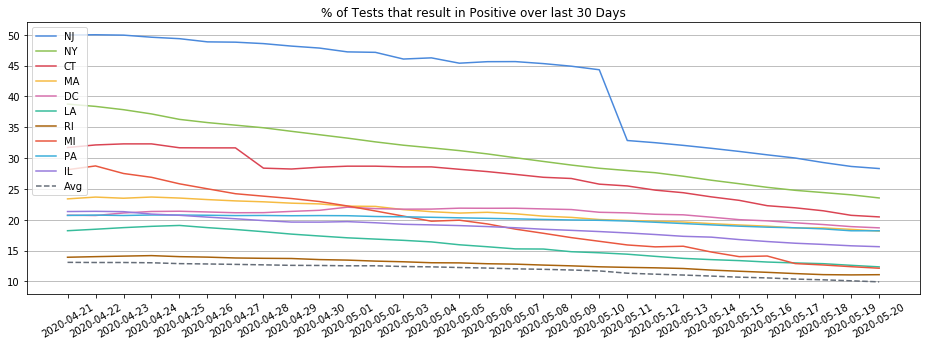

In [54]:
n_days = 30
top = 10

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='deaths/1M', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['test percent'].values, label=s)

#date labels
dates = []
for d in dfState.index.tolist()[:n_days]:
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['positive'].values.tolist()[:n_days])

#average for each day (create a variable for each day and then plot it like the rest)
avgs = []
for d in dfState['date'].tolist()[:n_days]:
    df_2 = states[states['date']==d]
    datastream = df_2['test percent']
    avg = stat.mean(datastream)
    avgs.append(avg)

avgs = avgs[::-1]
plt.plot(avgs, '--', label="Avg")

#graph
plt.legend(loc='upper left')
plt.title('% of Tests that result in Positive over last '+str(n_days)+' Days')
# plt.ylim(0,100)
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Percent Positive Testing In US States')

# Maps
This next section will focus on creating heat map visualizations of the infection on several levels based on different data bases:
 - World Data: using the ECDC database
 - State Data: using the COVID Tracking Project database
 - County Data: using the John Hopkins database
 

In [55]:
def mdy(date):
    month = date.month
    if(month<10): month = '0'+str(month)
    
    day = date.day
    if(day<10): day = '0'+str(day)
        
    year = date.year
    
    return str(month)+'-'+str(day)+'-'+str(year)

In [56]:
def daysBack(date, days):
    return date-timedelta(days=days)

In [57]:
def daysForward(date, days):
    return date+timedelta(days=days)

In [58]:
current_day = mdy(datetime.now())
prev_day = mdy(daysBack(datetime.now(), 1))
current_day

'05-21-2020'

In [59]:
try:
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+current_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})
except:
    print("WARNING, Data has not been updated...")
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+prev_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})

adjFip = []
for fip in county_data['FIPS']:
    if isinstance(fip, float) == False:
        if len(fip)==4: 
            fip = '0'+fip
    adjFip.append(fip)
county_data['FIPS']=adjFip

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
county_pop = pd.read_csv(url, encoding='ISO-8859-1',
                        dtype={"STATE": str,
                              "COUNTY": str})

countyInfo = county_pop[['STATE', 'COUNTY', 'POPESTIMATE2019', 'STNAME', 'CTYNAME']]
countyInfo['FIPS'] = countyInfo['STATE']+countyInfo['COUNTY']
county_data = pd.merge(county_data, countyInfo, on='FIPS')

county_data['Cases/1k Pop']=county_data['Confirmed']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/1k Pop']=county_data['Deaths']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/Case']=county_data['Deaths']/county_data['Confirmed']

county_data = county_data.dropna()
print(county_data['Last_Update'].tolist()[0])
county_data = county_data.drop(['STATE', 'COUNTY', 'Lat', 'Long_', 'Country_Region', 'STNAME', 'CTYNAME', 'Combined_Key', 'Last_Update'], axis=1)

WARNING, Data has not been updated...
2020-05-21 02:32:48


/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Top 10 Counties by Total Cases

In [60]:
county_data = county_data.sort_values(by='Confirmed', ascending=False)
county_data = county_data.reset_index(drop=True)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
1,17031,Cook,Illinois,66213,3074,0,63139,5150233,12.856312,0.596866,0.046426
2,06037,Los Angeles,California,40895,1973,0,38922,10039107,4.073569,0.196531,0.048246
3,36059,Nassau,New York,39368,2065,0,37303,1356924,29.012679,1.521824,0.052454
4,36103,Suffolk,New York,38411,1791,0,36620,1476601,26.013121,1.212921,0.046627
5,36119,Westchester,New York,32517,1305,0,31212,967506,33.609094,1.348829,0.040133
6,42101,Philadelphia,Pennsylvania,20359,1152,0,19207,1584064,12.852385,0.727243,0.056584
7,25017,Middlesex,Massachusetts,19708,1462,0,18246,1611699,12.228090,0.907117,0.074183
8,26163,Wayne,Michigan,19432,2284,0,17148,1749343,11.108170,1.305633,0.117538
9,34017,Hudson,New Jersey,18880,1106,0,17774,672391,28.078901,1.644876,0.058581


## Top 10 Counties by Total Deaths

In [61]:
county_data = county_data.sort_values(by='Deaths', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
1,17031,Cook,Illinois,66213,3074,0,63139,5150233,12.856312,0.596866,0.046426
8,26163,Wayne,Michigan,19432,2284,0,17148,1749343,11.108170,1.305633,0.117538
3,36059,Nassau,New York,39368,2065,0,37303,1356924,29.012679,1.521824,0.052454
2,06037,Los Angeles,California,40895,1973,0,38922,10039107,4.073569,0.196531,0.048246
4,36103,Suffolk,New York,38411,1791,0,36620,1476601,26.013121,1.212921,0.046627
12,34013,Essex,New Jersey,16952,1571,0,15381,798975,21.217185,1.966269,0.092673
10,34003,Bergen,New Jersey,17518,1500,0,16018,932202,18.792064,1.609093,0.085626
7,25017,Middlesex,Massachusetts,19708,1462,0,18246,1611699,12.228090,0.907117,0.074183
5,36119,Westchester,New York,32517,1305,0,31212,967506,33.609094,1.348829,0.040133


## Top 10 Counties by Cases/1k Population

In [62]:
county_data = county_data.sort_values(by='Cases/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
165,47169,Trousdale,Tennessee,1384,4,0,1380,11284,122.651542,0.354484,0.002890
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
213,05079,Lincoln,Arkansas,966,8,0,958,13024,74.170762,0.614251,0.008282
156,31043,Dakota,Nebraska,1475,15,0,1460,20026,73.654249,0.749026,0.010169
162,27105,Nobles,Minnesota,1396,2,0,1394,21629,64.542975,0.092468,0.001433
412,47095,Lake,Tennessee,403,0,0,403,7016,57.440137,0.000000,0.000000
315,31037,Colfax,Nebraska,559,2,0,557,10709,52.199085,0.186759,0.003578
159,20057,Ford,Kansas,1437,8,0,1429,33619,42.743687,0.237961,0.005567
150,18017,Cass,Indiana,1564,6,0,1558,37689,41.497519,0.159198,0.003836
298,47007,Bledsoe,Tennessee,607,1,0,606,15064,40.294742,0.066383,0.001647


## Top 10 Counties by Deaths/1k Population

In [63]:
county_data = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
712,13243,Randolph,Georgia,170,21,0,149,6778,25.081145,3.098259,0.123529
575,13099,Early,Georgia,236,29,0,207,10190,23.159961,2.845927,0.122881
643,13273,Terrell,Georgia,203,24,0,179,8531,23.795569,2.813269,0.118227
12,34013,Essex,New Jersey,16952,1571,0,15381,798975,21.217185,1.966269,0.092673
19,36087,Rockland,New York,12831,611,0,12220,325789,39.384387,1.875447,0.047619
242,22095,St. John the Baptist,Louisiana,832,77,0,755,42837,19.422462,1.797511,0.092548
15,34039,Union,New Jersey,15122,994,0,14128,556341,27.181171,1.786674,0.065732
715,13141,Hancock,Georgia,169,15,0,154,8457,19.983446,1.773679,0.088757
14,34031,Passaic,New Jersey,15426,855,0,14571,501826,30.739738,1.703778,0.055426


## State Top Counties

In [64]:
pick= 'Texas'

temp_df = county_data[county_data['Province_State']==pick]
temp_df = temp_df.sort_values(by='Confirmed', ascending=False)
temp_df.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
22,48201,Harris,Texas,10095,210,0,9885,4713325,2.141800,0.044555,0.020802
32,48113,Dallas,Texas,7904,191,0,7713,2635516,2.999033,0.072472,0.024165
66,48439,Tarrant,Texas,4643,130,0,4513,2102515,2.208308,0.061831,0.027999
98,48453,Travis,Texas,2595,81,0,2514,1273954,2.036965,0.063582,0.031214
108,48029,Bexar,Texas,2278,62,0,2216,2003554,1.136980,0.030945,0.027217
111,48375,Potter,Texas,2193,24,0,2169,117415,18.677341,0.204403,0.010944
123,48141,El Paso,Texas,1930,54,0,1876,839238,2.299705,0.064344,0.027979
142,48157,Fort Bend,Texas,1621,40,0,1581,811688,1.997073,0.049280,0.024676
189,48121,Denton,Texas,1116,28,0,1088,887207,1.257880,0.031560,0.025090
199,48085,Collin,Texas,1073,31,0,1042,1034730,1.036985,0.029960,0.028891


In [65]:
nc = county_data[county_data['Province_State']=='North Carolina']
tx = county_data[county_data['Province_State']=='Texas']
ny = county_data[county_data['Province_State']=='New York']
la = county_data[county_data['Province_State']=='Louisiana']

print("TOTAL CONFIRMED: "+str(county_data['Confirmed'].sum()))
print("TOTAL DEATHS   : "+str(county_data['Deaths'].sum()))
print("CASE DEATH RATE: "+str(county_data['Deaths'].sum()/county_data['Confirmed'].sum()))
print("------------")

confirmed = county_data['Confirmed'].values.tolist()
print("Average Cases/County: "+str(stat.mean(confirmed)))
print("Median Cases/County: "+str(stat.median(confirmed)))
print("------------")

dead = county_data['Deaths'].values.tolist()
print("Average Deaths/County: "+str(stat.mean(dead)))
print("Median Deaths/County: "+str(stat.median(dead)))
print("------------")

datastream = county_data['Cases/1k Pop'].values.tolist()
print("Average Cases/1k: "+str(stat.mean(datastream)))
print("Median Median/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/1k Pop'].values.tolist()
print("Average Deaths/1k: "+str(stat.mean(datastream)))
print("Median Deaths/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/Case'].values.tolist()
print("Average Deaths/Case: "+str(stat.mean(datastream)))
print("Median Deaths/Case: "+str(stat.median(datastream)))
print("------------")

TOTAL CONFIRMED: 1536138
TOTAL DEATHS   : 92187
CASE DEATH RATE: 0.06001218640512766
------------
Average Cases/County: 529.7027586206897
Median Cases/County: 37.0
------------
Average Deaths/County: 31.788620689655172
Median Deaths/County: 1.0
------------
Average Cases/1k: 2.7633019360667443
Median Median/1k: 1.1639097833376912
------------
Average Deaths/1k: 0.1172862209508847
Median Deaths/1k: 0.02255805599855438
------------
Average Deaths/Case: 0.035952510532649064
Median Deaths/Case: 0.016666666666666666
------------


## Filtered Stats
Showing the per capita rates for counties over a certain threshold, to prevent small counties with only a few infections showing up in the top list. 

In [66]:
filtered = county_data.sort_values(by='Cases/1k Pop', ascending=False)
filtered = filtered[filtered['Confirmed']>=1000]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
165,47169,Trousdale,Tennessee,1384,4,0,1380,11284,122.651542,0.354484,0.002890
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
156,31043,Dakota,Nebraska,1475,15,0,1460,20026,73.654249,0.749026,0.010169
162,27105,Nobles,Minnesota,1396,2,0,1394,21629,64.542975,0.092468,0.001433
159,20057,Ford,Kansas,1437,8,0,1429,33619,42.743687,0.237961,0.005567
150,18017,Cass,Indiana,1564,6,0,1558,37689,41.497519,0.159198,0.003836
19,36087,Rockland,New York,12831,611,0,12220,325789,39.384387,1.875447,0.047619
102,39101,Marion,Ohio,2540,18,0,2522,65093,39.021093,0.276527,0.007087
166,20055,Finney,Kansas,1363,6,0,1357,36467,37.376258,0.164532,0.004402
116,39129,Pickaway,Ohio,2029,32,0,1997,58457,34.709273,0.547411,0.015771


In [67]:
filtered = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
filtered = filtered[filtered['Deaths']>=100]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,194550,20934,0,173616,1628706,119.450656,12.853148,0.107602
12,34013,Essex,New Jersey,16952,1571,0,15381,798975,21.217185,1.966269,0.092673
19,36087,Rockland,New York,12831,611,0,12220,325789,39.384387,1.875447,0.047619
15,34039,Union,New Jersey,15122,994,0,14128,556341,27.181171,1.786674,0.065732
14,34031,Passaic,New Jersey,15426,855,0,14571,501826,30.739738,1.703778,0.055426
9,34017,Hudson,New Jersey,18880,1106,0,17774,672391,28.078901,1.644876,0.058581
10,34003,Bergen,New Jersey,17518,1500,0,16018,932202,18.792064,1.609093,0.085626
140,13095,Dougherty,Georgia,1672,139,0,1533,87956,19.009505,1.580336,0.083134
3,36059,Nassau,New York,39368,2065,0,37303,1356924,29.012679,1.521824,0.052454
5,36119,Westchester,New York,32517,1305,0,31212,967506,33.609094,1.348829,0.040133


# Analysis and Notes
- (4/12/20) Big spike in small Georgia counties like Daughtry and Randolph due to a funeral where one of the attendees had the virus, after ignoring stay at home warnings
    - https://www.nytimes.com/2020/03/30/us/coronavirus-funeral-albany-georgia.html
- (4/15/20) infection at a meat packaging plant in Iowa results in rapid spreading of virus, faster than in NYC
    - https://www.iowapublicradio.org/post/coronavirus-surges-louisa-county-following-outbreak-meat-processing-plant#stream/0
- (4/16/20) Belgium numbers are higher than other countries because they are counting "potential" deaths by corona, just just confirmed 
    - https://www.wsj.com/articles/as-virus-death-tolls-rise-world-wide-belgium-considers-adjusting-its-down-11587059597?emailToken=44cf96739b5dcf3f26410cf2a1e166a0fMDPag6kMmvXqkvgQOj+c3QHTtBV1wt1bro8+4pdbmf3Q9Bq+Z9tBwewoll5PSXu8kmCDy5JhnkqaAuFzr957dX5iZF4a2eIrRkXtlL371llCZNaxEIL4ASeTVAtQExtvmt8w4XijBpepC8NuGsWKw%3D%3D&reflink=article_imessage_sharecart
- (4/19/20) Marion County Ohio became the third highest per capita county after a jail in the county reported over 1000 cases 
    - https://www.10tv.com/article/prison-covid-19-cases-puts-marion-county-more-confirmed-cases-any-other-ohio-county-2020-apr
- (4/24/20) Lincoln County Arkansas Prison reports hundreds of cases, making it the second highest per capita infection county
    - https://www.themarshallproject.org/2020/04/24/these-prisons-are-doing-mass-testing-for-covid-19-and-finding-mass-infections
- (4/26/20) Bledsoe County Tennessee prison reports hundreds of cases, making it the third highest per capita infection county
    - https://wdef.com/2020/04/24/bledsoe-prison-warping-covid-19-case-stats-county/
- (4/26/20) Error in Spain's data is causing them to report 0 total cases by today. There is no explanation for why this is
- (4/27/20) Spains data as of today contains negative cases for the date of 4/19 (-1400). There is no explanation for why this is
- (5/1/20) Spains data continues to disrupt the graphs and visualizations. There is now no reported data for April 30th, and is causing a gap
- (5/4/20) Trousdale County Tennessee jumps to highest infection per capita due to 1200 cases at a prison
    - https://www.wsmv.com/news/over-1-200-staff-inmates-test-positive-for-covid-19-at-trousdale-turner-correctional-center/article_568c03d2-8bde-11ea-a447-4b7eaabeb67b.html
- (5/4/20) Spain data update: the missing value is now for May 2, still resulting in a gap 2 days prior to current data
- (5/17/20) Fixed the Spain missing data issue by duplicating its most recent data and adding it as the current date. Chose to duplicate instead of add as 0's to maintain roughly the same percent increase for maps and graphs